In [22]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

## data import and preparation 

In [79]:
iris = datasets.load_iris()

X = iris.data
Y = iris.target

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [80]:
iris_data = DataFrame(X)
iris_data.columns=['sepal length','sepal width','petal length','petal width']

In [81]:
iris_target = DataFrame(Y,columns=['species'])

In [10]:
def flower(num):
    if(num==0):
        return "setosa"
    elif(num==1):
        return "versicolor"
    else:
        return "virginica"

In [89]:
iris_target['species']=iris_target['species'].apply(flower)

In [90]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [91]:
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## data visualization using seaborn

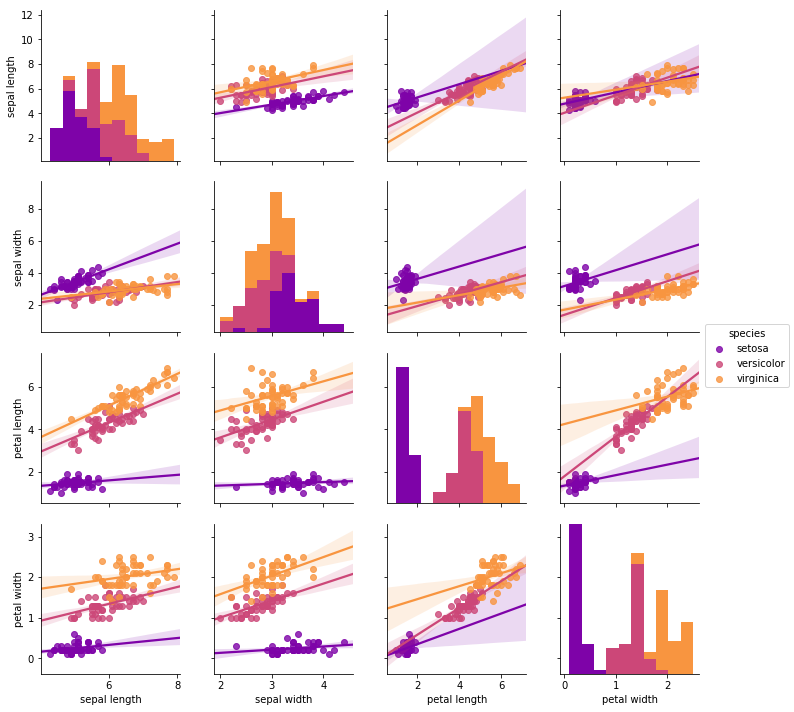

In [19]:
sns.pairplot(iris,hue='species',palette='plasma',kind='reg')

## implementing SVM

In [23]:
svm = svm.SVC()

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.35,random_state=3)

svm.fit(X_train,Y_train)

pred = svm.predict(X_test)

print(metrics.accuracy_score(Y_test,pred))

0.962264150943


## implementing the different kernel tricks

In [85]:
# Import all SVM 
from sklearn import svm



# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.iloc[:,:2]
Y = iris.iloc[:,4]

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [86]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X.iloc[:, 0].min() - 1
x_max =X.iloc[:, 0].max() + 1

# Y axis min and max
y_min = X.iloc[:, 1].min() - 1
y_max = X.iloc[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [87]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\contour.py:920: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


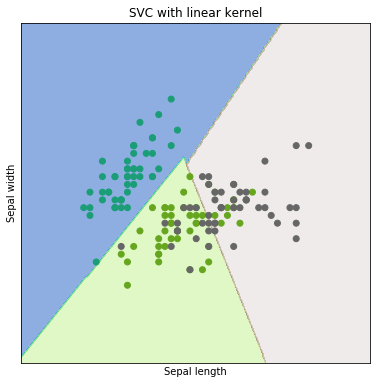

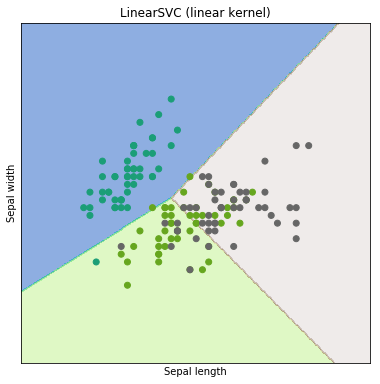

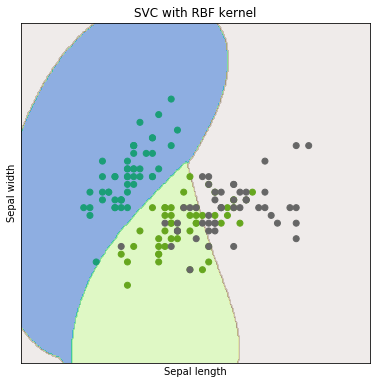

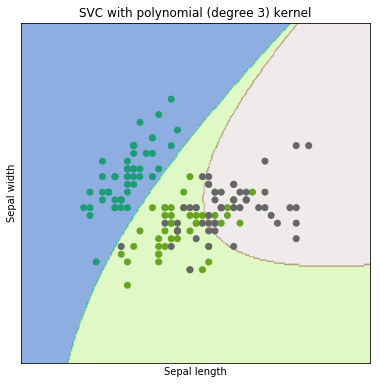

In [88]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
   
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    

[]